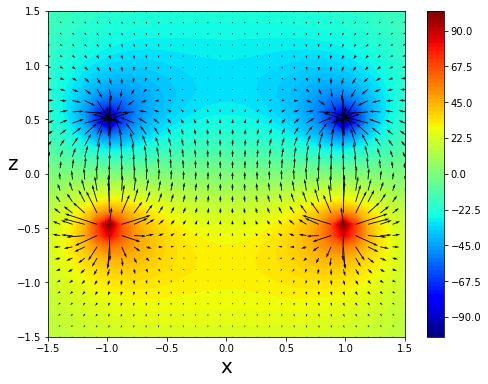

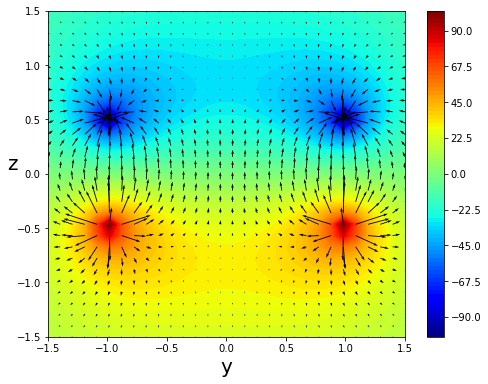

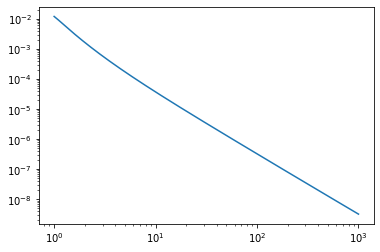

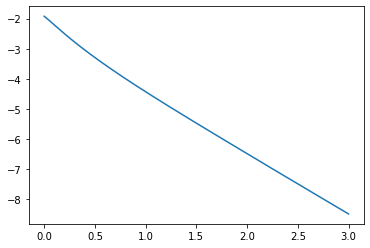

[-2.02654515 -2.42681029]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from numba import njit

# Definerer universale konstanter her
epsilon_0 = sc.epsilon_0
@njit(cache=True)
def epot(r, qi, ri):    # Funksjon som regner elektrisk potensial i et punkt
    Ri = r - ri
    Rinorm = np.linalg.norm(Ri)
    V = qi / (4*np.pi*epsilon_0*Rinorm)
    return V

# Definerer parametere
a = 1
N = 20
Q = 1e-8
L = 1.5
NL = 30

x = np.linspace(-L, L, NL)
y = np.linspace(-L, L, NL)
z = np.linspace(-L, L, NL)

# Lager meshgrid av 3D-rommet med indexing 'ij' (indeks grei for senere)
rx, ry, rz = np.meshgrid(x, y, z, indexing='ij')
from numba import njit
@njit(cache=True)
def f():
    V = np.zeros((NL, NL, NL))
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
        for j in range(N):
            theta = 2*np.pi / N*j
            r1 = np.array([a*np.cos(theta), a*np.sin(theta), -a/2])
            dq1 = Q/N
            dV1 = epot(r, dq1, r1)
            r2 = np.array([a*np.cos(theta), a*np.sin(theta), a/2])
            dq2 = -Q/N
            dV2 = epot(r, dq2, r2)
            V.flat[i] += dV1 + dV2
    return V

V = f()
Ex, Ey, Ez = np.gradient(-V)        # Potensialet er gradient av -V

# Sjekk med kode fra forelesning om dette stemmer med NL = 40
# og kun legge sammen dE1[0]
C = int(np.ceil((NL - 1)/2))        # Finner indeks som ligger på midten så jeg finner planet som skjærer i origo

fig = plt.figure(figsize=(8, 6))
pot = plt.contourf(rx[:,C], rz[C], V[:,C], cmap='jet', levels=100)
plt.xlabel('x', fontsize=20); plt.ylabel('z', fontsize=20, rotation=0)
plt.colorbar(pot)
plt.quiver(rx[:,C], rz[C], Ex[:,C], Ez[C])  # Pilplott i xz-planet
plt.show()

fig = plt.figure(figsize=(8, 6))
pot = plt.contourf(ry[C], rz[C], V[C], cmap='jet', levels=100)
plt.xlabel('y', fontsize=20); plt.ylabel('z', fontsize=20, rotation=0)
plt.colorbar(pot)
plt.quiver(ry[C], rz[C], Ey[C], Ez[C])      # Pilplott i xy-planet (burde være lik som xz-planet her)
plt.show()

@njit(cache=True)
def f():
    N = 10000
    dx = 0.0001
    x = np.linspace(a, 1000, N)
    y = np.linspace(a, 1000, N)
    z = np.linspace(a, 1000, N)
    Vs = np.zeros(x.shape)
    for i in range(len(x)):
        r = np.array([x[i], 0, z[i]])
        theta = 2*np.pi / len(x)*i
        r1 = np.array([a*np.cos(theta), a*np.sin(theta), -a/2])
        dq1 = Q/N
        dV1 = epot(r, dq1, r1)
        r2 = np.array([a*np.cos(theta), a*np.sin(theta), a/2])
        dq2 = -Q/N
        dV2 = epot(r, dq2, r2)
        Vs[i] = dV1 + dV2
    return x, Vs

x, Vs = f()
plt.loglog(x, abs(Vs))
plt.show()
# Eller
xlog = np.log10(x)
Vslog = np.log10(abs(Vs))
plt.plot(xlog, Vslog)
plt.show()
p = np.polyfit(xlog, Vslog, 1)
print(p)


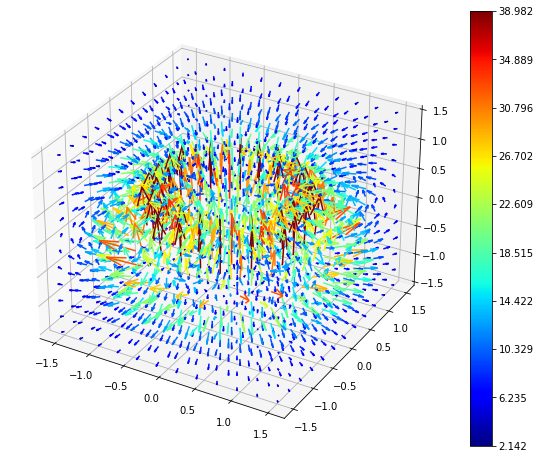

In [2]:
# Definerer universale konstanter her
epsilon_0 = sc.epsilon_0
@njit(cache=True)
def epot(r, qi, ri):    # Funksjon som regner elektrisk potensial i et punkt
    Ri = r - ri
    Rinorm = np.linalg.norm(Ri)
    V = qi / (4*np.pi*epsilon_0*Rinorm)
    return V

# Definerer parametere
a = 1
N = 20
Q = 1e-8
L = 1.5
NL = 12

x = np.linspace(-L, L, NL)
y = np.linspace(-L, L, NL)
z = np.linspace(-L, L, NL)

# Lager meshgrid av 3D-rommet med indexing 'ij' (indeks grei for senere)
rx, ry, rz = np.meshgrid(x, y, z, indexing='ij')
from numba import njit
@njit(cache=True)
def f():
    V = np.zeros((NL, NL, NL))
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
        for j in range(N):
            theta = 2*np.pi / N*j
            r1 = np.array([a*np.cos(theta), a*np.sin(theta), -a/2])
            dq1 = Q/N
            dV1 = epot(r, dq1, r1)
            r2 = np.array([a*np.cos(theta), a*np.sin(theta), a/2])
            dq2 = -Q/N
            dV2 = epot(r, dq2, r2)
            V.flat[i] += dV1 + dV2
    return V

V = f()
Ex, Ey, Ez = np.gradient(-V)        # Potensialet er gradient av -V


# Videre til å plotte i 3D:
# Må gjøre dette for å få laget med cmap på 3D-quiver
# dette handler kun om farger på 3D-pilplott
k = np.sqrt(Ex**2 + Ey**2 + Ez**2)      # Vil gradere farge utifar størrelse på felt
# Flat ned og normaliser
c = np.ravel(k) / np.ptp(k)     # Ravel flater ned dimensjonene til en array
c = np.concatenate((c, np.repeat(c, 2)))        # Gjentar c 2 ganger og konkatenerer så lista ikke går tom for verdier
c = plt.cm.jet(c)           # Henter fargekart og legger inn fargeskala

# print(np.ptp(c) == np.max(c) - np.min(c))     # Returnerer True, ptp - peak to peak

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
len = 1 / (1.5*np.max(np.sqrt(Ex**2 + Ey**2 + Ez**2)))
quiver_3d = ax.quiver(rx, ry, rz, Ex, Ey, Ez, colors=c, cmap='jet', length=len, arrow_length_ratio=0.5)
cbar = fig.colorbar(quiver_3d, ax=ax)
# Få på plass riktige verdier på cbar
# definerer funksjon som runder opp tall til andre desimal siden map-funksjon lenger ned ikke aksepterer round() direkte
rnd = lambda t: round(t, 3)
N = 10      # Antall ticklabels ønsket
cbar.set_ticks(np.linspace(0, 1, N))
cbar.set_ticklabels([*map(rnd, np.linspace(np.min(k), np.max(k), N))])  # map sender alle gitte-verdier gjennom gitt funksjon, jeg pakker dem ut
plt.show()
